In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv['data'].shape

(400, 4096)

In [6]:
oliv['images'].shape

(400, 64, 64)

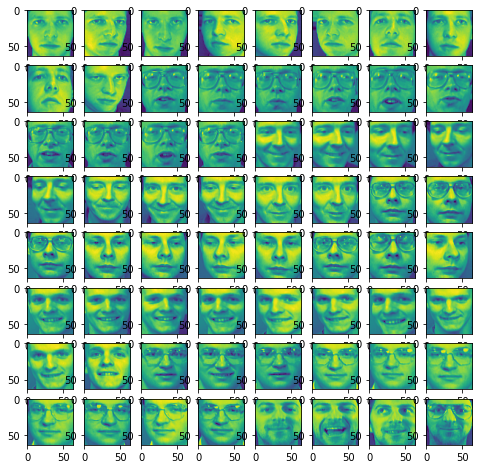

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    # we are going through first 64 images only
    ax = fig.add_subplot(8,8,i+1)   #herenumbering starts from 1
    ax.imshow(oliv.images[i])
plt.show()

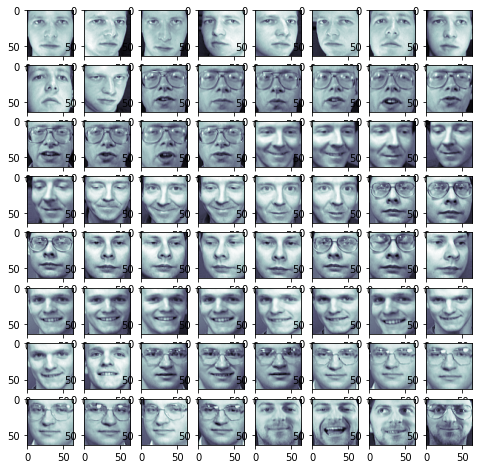

In [8]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    # we are going through first 64 images only
    ax = fig.add_subplot(8,8,i+1)   #herenumbering starts from 1
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [9]:
x = oliv.data
y = oliv.target

In [10]:
pca = PCA()
pca.fit(x)

PCA()

In [11]:
pca.components_

array([[-0.00419152, -0.00710946, -0.00933617, ...,  0.00018519,
         0.00337968,  0.00318828],
       [-0.02859164, -0.03328821, -0.03784624, ...,  0.02962781,
         0.02721297,  0.02488897],
       [ 0.00135659, -0.00032579, -0.00019771, ..., -0.01541373,
        -0.01370986, -0.01188348],
       ...,
       [ 0.00223517,  0.02056838,  0.0151594 , ..., -0.01273594,
        -0.05848993, -0.07650334],
       [ 0.01714869,  0.02917847, -0.0094252 , ...,  0.00159123,
         0.01249396, -0.00815191],
       [-0.00478715,  0.01267752,  0.01728035, ..., -0.01136206,
        -0.01625577, -0.00547431]], dtype=float32)

In [12]:
pca.components_.shape

(400, 4096)

No. of components is always min(x,y) when nothing is passed

In [13]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.99:
    current_sum += pca.explained_variance_[k]
    k=k+1
k

260

In [14]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k=k+1
k

123

In [25]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

## Exploring whiten

In [22]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [23]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [24]:
x_approx_images = x_approx.reshape(400,64,64)

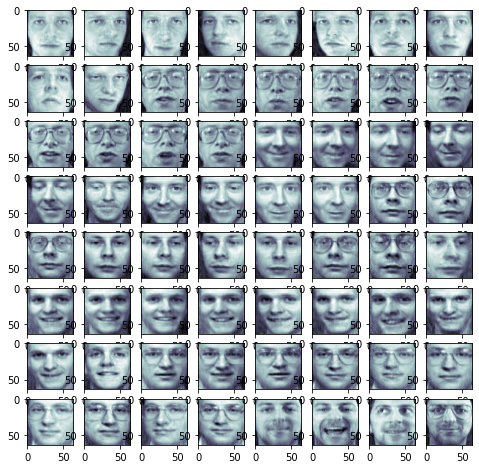

In [21]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    # we are going through first 64 images only
    ax = fig.add_subplot(8,8,i+1)   #herenumbering starts from 1
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

Image looks preety much similar to the original one

## EigenFaces

In [30]:
eigenvector = pca.components_
eigenvector.shape

(123, 4096)

In [32]:
eigenfaces = eigenvector.reshape(123,64,64)

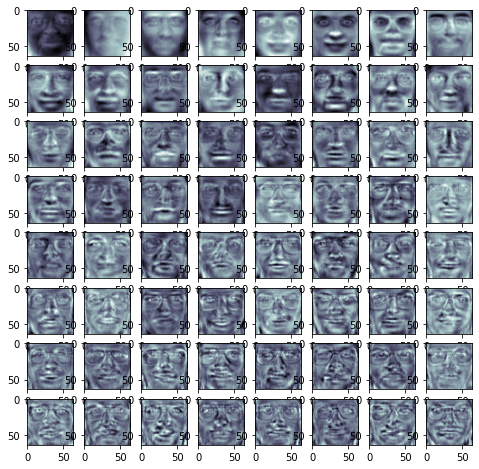

In [33]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    # we are going through first 64 images only
    ax = fig.add_subplot(8,8,i+1)   #herenumbering starts from 1
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

# Classification of  LFW

In [72]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble  #for random forest
import time

In [35]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [36]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [38]:
lfw.data.shape

(1140, 1850)

In [39]:
lfw.images.shape

(1140, 50, 37)

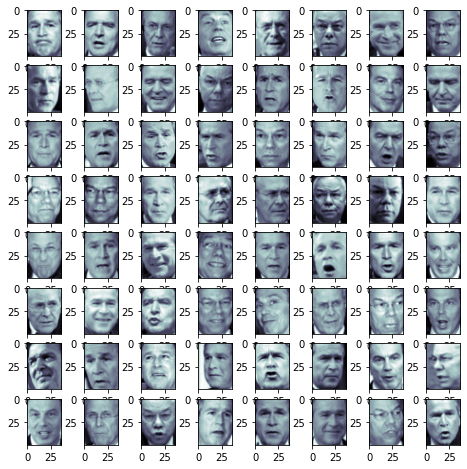

In [42]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    # we are going through first 64 images only
    ax = fig.add_subplot(8,8,i+1)   #herenumbering starts from 1
    ax.imshow(lfw.images[i], cmap = plt.cm.bone)
plt.show()

In [61]:
x,y = lfw.data, lfw.target
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = 69)
pca_lfw = PCA()
pca_lfw.fit(x_train)

PCA()

In [62]:
k = 0
total = sum(pca_lfw.explained_variance_)
current_sum = 0
while current_sum/total < 0.99:
    current_sum += pca_lfw.explained_variance_[k]
    k=k+1
k

317

In [64]:
pca_lfw = PCA(n_components = k, whiten = True)
x_transformed_data = pca_lfw.fit_transform(x_train)
x_transformed_data.shape

(855, 317)

In [65]:
x_approx = pca_lfw.inverse_transform(x_transformed_data)
x_approx.shape

(855, 1850)

In [66]:
x_approx = x_approx.reshape((855,50,37))

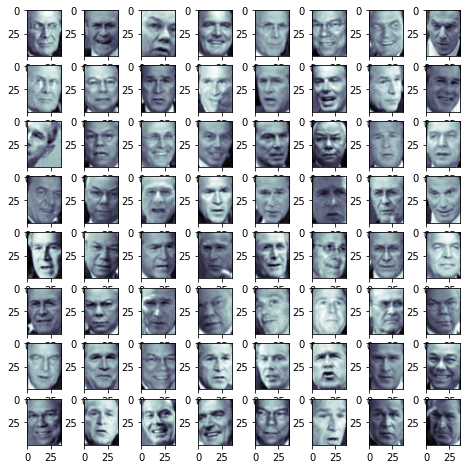

In [67]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    # we are going through first 64 images only
    ax = fig.add_subplot(8,8,i+1)   #herenumbering starts from 1
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

In [68]:
eigenvector = pca_lfw.components_
eigenvector.shape

(317, 1850)

In [69]:
eigenfaces = eigenvector.reshape(k,50,37)

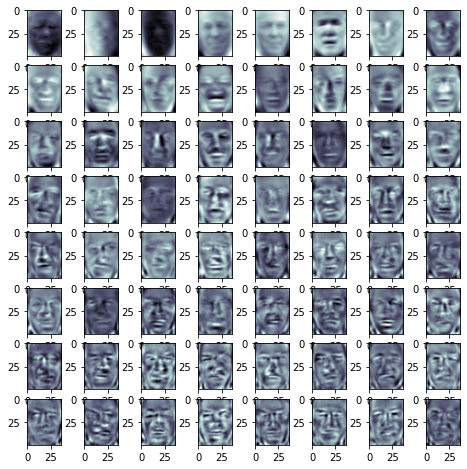

In [70]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    # we are going through first 64 images only
    ax = fig.add_subplot(8,8,i+1)   #herenumbering starts from 1
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

In [71]:
x_train_pca = x_transformed_data
x_test_pca = pca_lfw.transform(x_test)

In [75]:
rf = ensemble.RandomForestClassifier()
start = time.time()
#without using pca
rf.fit(x_train,y_train)
print("Fitting time without PCA : ", time.time()-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Fitting time without PCA :  1.5182607173919678
              precision    recall  f1-score   support

           0       0.70      0.69      0.70        62
           1       0.73      0.29      0.41        28
           2       0.60      0.96      0.74       124
           3       0.50      0.04      0.08        24
           4       1.00      0.30      0.46        47

    accuracy                           0.65       285
   macro avg       0.71      0.46      0.48       285
weighted avg       0.69      0.65      0.60       285

[[ 43   0  19   0   0]
 [  4   8  16   0   0]
 [  4   1 119   0   0]
 [  3   1  19   1   0]
 [  7   1  24   1  14]]


In [78]:
rf = ensemble.RandomForestClassifier()
start = time.time()
#without using pca
rf.fit(x_train_pca,y_train)
print("Fitting time without PCA : ", time.time()-start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Fitting time without PCA :  0.7561242580413818
              precision    recall  f1-score   support

           0       0.67      0.39      0.49        62
           1       0.00      0.00      0.00        28
           2       0.47      0.93      0.62       124
           3       0.50      0.04      0.08        24
           4       0.00      0.00      0.00        47

    accuracy                           0.49       285
   macro avg       0.33      0.27      0.24       285
weighted avg       0.39      0.49      0.38       285

[[ 24   0  38   0   0]
 [  2   0  26   0   0]
 [  9   0 115   0   0]
 [  0   0  23   1   0]
 [  1   0  45   1   0]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision in both the cases are  very bad. 
But fitting time in case of PCA is less.

### Trying when whiten = false

In [88]:
pca_lfw = PCA(n_components = k)
x_transformed_data = pca_lfw.fit_transform(x_train)
x_transformed_data.shape

(855, 317)

In [89]:
x_train_pca = x_transformed_data
x_test_pca = pca_lfw.transform(x_test)

In [90]:
rf = ensemble.RandomForestClassifier()
start = time.time()
#without using pca
rf.fit(x_train,y_train)
print("Fitting time without PCA : ", time.time()-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Fitting time without PCA :  1.3712759017944336
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        62
           1       0.90      0.32      0.47        28
           2       0.59      0.95      0.73       124
           3       0.67      0.08      0.15        24
           4       1.00      0.21      0.35        47

    accuracy                           0.64       285
   macro avg       0.77      0.45      0.48       285
weighted avg       0.72      0.64      0.58       285

[[ 43   0  19   0   0]
 [  3   9  16   0   0]
 [  5   0 118   1   0]
 [  2   1  19   2   0]
 [  9   0  28   0  10]]


In [91]:
rf = ensemble.RandomForestClassifier()
start = time.time()
#without using pca
rf.fit(x_train_pca,y_train)
print("Fitting time without PCA : ", time.time()-start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Fitting time without PCA :  0.7350339889526367
              precision    recall  f1-score   support

           0       0.73      0.39      0.51        62
           1       0.00      0.00      0.00        28
           2       0.48      0.96      0.64       124
           3       0.00      0.00      0.00        24
           4       1.00      0.04      0.08        47

    accuracy                           0.51       285
   macro avg       0.44      0.28      0.25       285
weighted avg       0.53      0.51      0.40       285

[[ 24   0  38   0   0]
 [  2   0  26   0   0]
 [  4   1 119   0   0]
 [  0   0  24   0   0]
 [  3   1  41   0   2]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using whiten = false has increased my precision